<a href="https://colab.research.google.com/github/grand-cat-unknown/backprop-from-scratch/blob/main/Backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return x**3 - 5*x + 7

In [3]:
x_range = np.arange(-5,5, 0.1)
print(x_range)
print(type(x_range))

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

In [4]:
f(x_range)

array([-93.   , -86.149, -79.592, -73.323, -67.336, -61.625, -56.184,
       -51.007, -46.088, -41.421, -37.   , -32.819, -28.872, -25.153,
       -21.656, -18.375, -15.304, -12.437,  -9.768,  -7.291,  -5.   ,
        -2.889,  -0.952,   0.817,   2.424,   3.875,   5.176,   6.333,
         7.352,   8.239,   9.   ,   9.641,  10.168,  10.587,  10.904,
        11.125,  11.256,  11.303,  11.272,  11.169,  11.   ,  10.771,
        10.488,  10.157,   9.784,   9.375,   8.936,   8.473,   7.992,
         7.499,   7.   ,   6.501,   6.008,   5.527,   5.064,   4.625,
         4.216,   3.843,   3.512,   3.229,   3.   ,   2.831,   2.728,
         2.697,   2.744,   2.875,   3.096,   3.413,   3.832,   4.359,
         5.   ,   5.761,   6.648,   7.667,   8.824,  10.125,  11.576,
        13.183,  14.952,  16.889,  19.   ,  21.291,  23.768,  26.437,
        29.304,  32.375,  35.656,  39.153,  42.872,  46.819,  51.   ,
        55.421,  60.088,  65.007,  70.184,  75.625,  81.336,  87.323,
        93.592, 100.

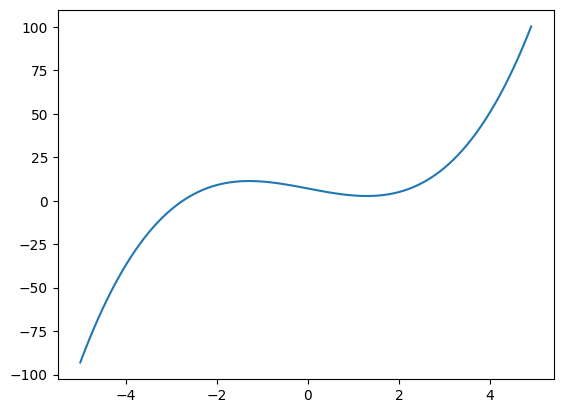

In [5]:
plt.plot(x_range, f(x_range))

In [6]:
def diff_f_x(x,h):
  return (f(x+h) - f(x))/h

In [7]:
diff_f_x(-2,0.00001)

6.999940000085302

In [8]:
a = 2.0
b = -3.0
c = 10.0

def g(a,b,c):
  return a*b + c

In [9]:
h = 0.0001
diff_g_a = (g(a+h,b,c) - g(a,b,c))/h
diff_g_b = (g(a,b+h,c) - g(a,b,c))/h
diff_g_c = (g(a,b,c+h) - g(a,b,c))/h

In [10]:
print(diff_g_a)
print(diff_g_b)
print(diff_g_c)

-3.000000000010772
2.0000000000042206
0.9999999999976694


# **This is where start building micrograd!**

In [11]:
import operator
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self._prev = list(_children)
        self._op = _op
        self.label = label
        # gradient w.r.t to the final output, not just it's parent
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data},label={self.label})"

    def _operation(self, other, operation, symbol, reverse=False):
        if isinstance(other, (float, int)):
            other = Value(other)
        if reverse:
            return Value(operation(other.data, self.data), _children=(other, self), _op=symbol)
        else:
            return Value(operation(self.data, other.data), _children=(self, other), _op=symbol)

    def __add__(self, other):
        return self._operation(other, lambda x, y: x + y, '+')

    def __sub__(self, other):
        return self._operation(other, lambda x, y: x - y, '-')

    def __mul__(self, other):
        return self._operation(other, lambda x, y: x * y, '*')

    def __truediv__(self, other):
        return self._operation(other, lambda x, y: x / y, '/')

    def __pow__(self, other):
        return self._operation(other, lambda x, y: x ** y, '**')

    def __radd__(self, other):
        return self._operation(other, lambda x, y: x + y, '+', reverse=True)

    def __rsub__(self, other):
        return self._operation(other, lambda x, y: x - y, '-', reverse=True)

    def __rmul__(self, other):
        return self._operation(other, lambda x, y: x * y, '*', reverse=True)

    def __rtruediv__(self, other):
        return self._operation(other, lambda x, y: x / y, '/', reverse=True)

    def __rpow__(self, other):
        return self._operation(other, lambda x, y: x ** y, '**', reverse=True)

    def apply_op(self, d, e):
        ops = {
            '+': operator.add,
            '-': operator.sub,
            '*': operator.mul,
            '/': operator.truediv,
            '**': operator.pow
        }
        if self._op in ops:
            return Value(ops[self._op](d.data, e.data), _children=(d, e), _op=self._op)
        else:
            raise ValueError(f"Invalid operation: {self._op}")

In [26]:
from graphviz import Digraph
def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if not v in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child,v))
        build(child)
  build(root)
  return nodes, edges

def draw_graph(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)

  for n in nodes:
    uid = str(id(n))
    dot.node (name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')

    if n._op:
      dot.node (name = uid + n._op, label = n._op, shape = 'oval')
      dot.edge(uid+n._op, uid)

  for e in edges:
    dot.edge(str(id(e[0])), str(id(e[1]))+e[1]._op)

  return dot


def grad_child(root):
  if len(root._prev) == 2:
    child1,child2 = root._prev
    if root._op == '*':
      child1.grad = child2.data
      child2.grad = child1.data
    elif root._op == '+':
      child1.grad = 1.0
      child2.grad = 1.0
    elif root._op == '-':
      child1.grad = 1.0
      child2.grad =  -1.0
    elif root._op == '/':
      child1.grad = (1.0/child2.data)
      child2.grad = - (child1.data/(child2.data**2))
    child1.grad = child1.grad * root.grad
    child2.grad = child2.grad * root.grad


def backprop(root):
  grad_child(root)
  for i in root._prev:
    backprop(i)

In [27]:
a = Value(3, label = 'a')
b = Value(4, label = 'b')
c = Value(2, label = 'c')
f = Value(5, label = 'f')
d = a + b; d.label = 'd'
e = d / c; e.label = 'e'
g = e - f; g.label = 'g'

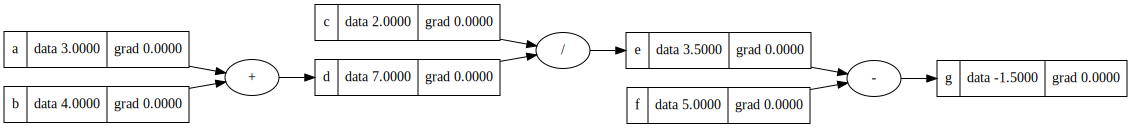

In [28]:
draw_graph(g)

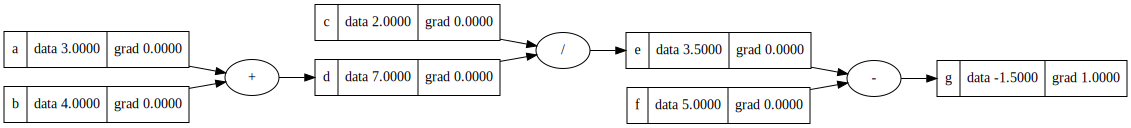

In [29]:
g.grad = 1.0
draw_graph(g)

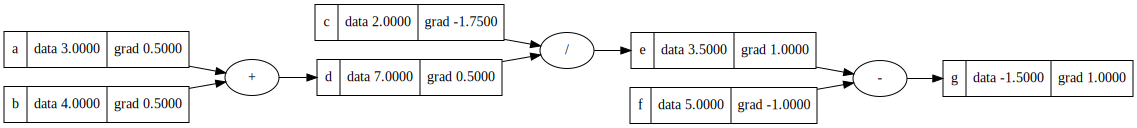

In [30]:
backprop(g)
draw_graph(g)